In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

Data preprocessing

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 1s 0us/step


Design of Model Architecture

In [3]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Add Droupout
# model.add(Dropout(0.1))

# Define weight decay 
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001, amsgrad=False)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    # optimizer='adam' / optimizer

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 121s 314ms/step - loss: 0.2772 - accuracy: 0.9193 - val_loss: 0.0908 - val_accuracy: 0.9719
Epoch 2/10
375/375 [==============================] - 104s 278ms/step - loss: 0.0724 - accuracy: 0.9775 - val_loss: 0.0722 - val_accuracy: 0.9775
Epoch 3/10
375/375 [==============================] - 115s 307ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0492 - val_accuracy: 0.9857
Epoch 4/10
375/375 [==============================] - 107s 285ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0451 - val_accuracy: 0.9865
Epoch 5/10
375/375 [==============================] - 106s 283ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 6/10
375/375 [==============================] - 111s 296ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0392 - val_accuracy: 0.9885
Epoch 7/10
375/375 [==============================] - 134s 357ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0363 -

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 12s 39ms/step - loss: 0.0261 - accuracy: 0.9921
Test accuracy: 0.9921000003814697


In [5]:
import matplotlib.pyplot as plt

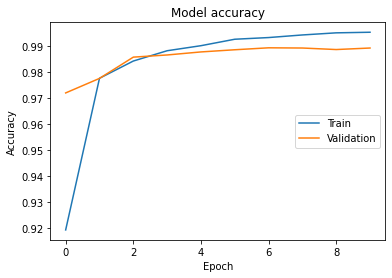

In [6]:
# Plot the training and validation accuracy over the training epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

In this example, the MNIST dataset is loaded and preprocessed, and a CNN model is defined and trained using the fit method. The model consists of several convolutional and max pooling layers, followed by fully connected dense layers. The model is compiled using the Adam optimizer and the categorical cross-entropy loss function, and is trained for 10 epochs with a batch size of 128. The model is evaluated on the test set and achieves an accuracy of approximately 99%, which beats the 98.7% accuracy of the LeNet 1998 model.